In [11]:
import numpy as np
import matplotlib.pyplot as plt
from iminuit import Minuit
import seaborn as sns
import sys
import scipy.stats as sc
import pandas as pd
import ffl

sys.path.append('../External_Functions')
from ExternalFunctions import UnbinnedLH, Chi2Regression, BinnedLH
from ExternalFunctions import nice_string_output, add_text_to_ax  # Useful functions to print fit results on figure

sns.set()
sns.set_context("paper", font_scale=1.4)
sns.set_style("ticks")

colors = sns.color_palette('deep', 10, desat = 1)
sns.set_palette(colors)
plt.rcParams['axes.grid'] = True
plt.rcParams['axes.grid.axis'] = 'y'
plt.rcParams['axes.grid.which'] = 'major'
plt.rcParams['grid.linestyle'] = '--'
plt.rcParams['grid.linewidth'] = 2
plt.rcParams['figure.figsize'] = (16, 9)


# 2.2 - A mass is moving in a damped harmonic oscillator with position $$x(t) = Ae^{−γt} cos(ωt)$$ as a function of time t, where $A = 1.01 ±0.19$, $γ = 0.12 ±0.05$, and $ω = 0.47 ±0.06$.

## 2.2.1 - At t = 1, calculate the uncertainty in position x.

I used standard error propagation to solve this problem resulting in the following equations.

$$ \frac{\partial x}{\partial A} = e^{-\gamma t} cos(\omega t) $$

$$ \frac{\partial x}{\partial \gamma } = - t  A e^{-\gamma t} cos(\omega t) $$

$$ \frac{\partial x}{\partial \omega} =  - t A e^{-\gamma t} sin(\omega t) $$

And the equation for the error on $x(t)$

$$ \sigma_x = \sqrt{(\frac{\partial x}{\partial A})^2 \sigma_A^2 + (\frac{\partial x}{\partial \gamma})^2 \sigma_{\gamma}^2 + (\frac{\partial x}{\partial \omega})^2 \sigma_{\omega}^2} $$


As far as I can tell, none of the terms have any problems around the values og $A$, $\gamma $ and $\omega$ so the i dont see the equation breaking down.

I get the value and uncertainty of $x(t=1) = 0.41 \pm 0.16$

In [12]:
a = 1.01
a_err = 0.19

g = 0.12
g_err = 0.05

w = 0.47
w_err = 0.06


def x(t):
    return a*np.exp(-g*t)*np.sin(w*t)

def derivs(t):
# deriv x wrt a
    dxda = np.exp(-g*t)*np.cos(w*t)
    term_a = (dxda*a_err)**2

# deriv x wrt g
    dxdg = -a*t*np.exp(-g*t)*np.cos(w*t)
    term_g = (dxdg*g_err)**2

# deriv x wrt w
    dxdw = -a*np.exp(-g*t)*t*np.sin(w*t)
    term_w = (dxdw*w_err)**2

    return term_a, term_g, term_w

terms_t1 = derivs(t=1)

x_t1 = x(t=1)
x_err_t1 = np.sqrt(terms_t1[0] + terms_t1[1] + terms_t1[2])

print(f'x(t=1) = {x_t1:.2f} +- {x_err_t1:.2f}')

x(t=1) = 0.41 +- 0.16


## 2.2.2 - Calculate the uncertainty in x as a function of t for each of the three variables, and commenton which variables dominate the uncertianty during which periods in time.

In [13]:
t = np.linspace(0, 50, 100)
term_a_list = []
term_g_list = []
term_w_list = []

uncertainty_x = []

for i in t:
    terms = derivs(t=i)
    term_a_list.append(terms[0])
    term_g_list.append(terms[1])
    term_w_list.append(terms[2])
    x_err = np.sqrt(terms[0] + terms[1] + terms[2])
    uncertainty_x.append(x_err)

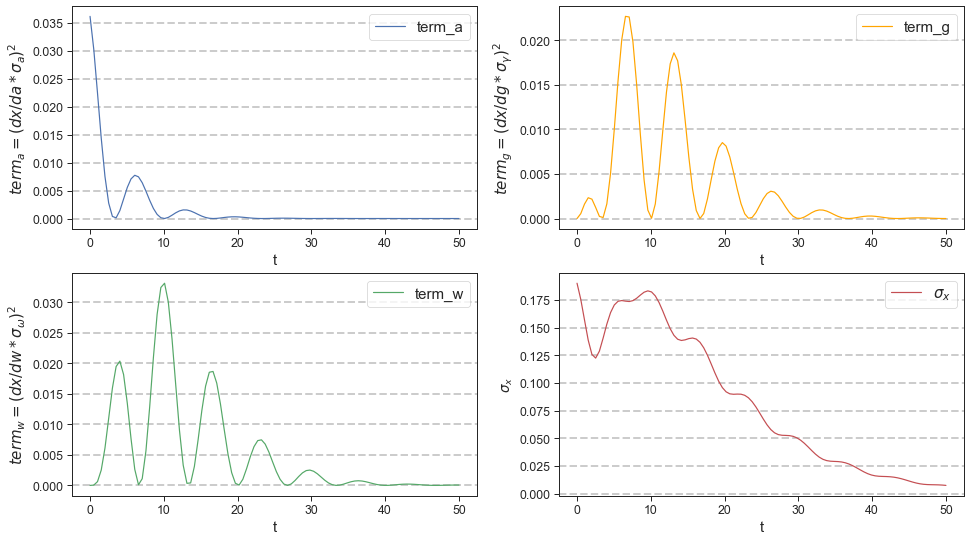

In [14]:
fig, ax = plt.subplots(2,2)
ax = ax.flatten()

ax[0].plot(t, term_a_list, label = 'term_a')
ax[0].set_xlabel('t', fontsize = 15)
ax[0].set_ylabel(r'$term_a = (dx/da * \sigma_a)^2$', fontsize = 15)

ax[1].plot(t, term_g_list, label = 'term_g', c='orange')
ax[1].set_xlabel('t', fontsize = 15)
ax[1].set_ylabel(r'$term_g = (dx/dg * \sigma_{\gamma})^2$', fontsize = 15)

ax[2].plot(t, term_w_list, label = 'term_w', c='g')
ax[2].set_xlabel('t', fontsize = 15)
ax[2].set_ylabel(r'$term_w = (dx/dw * \sigma_{\omega})^2$', fontsize = 15)

ax[3].plot(t, uncertainty_x, label = r'$\sigma_x$', c='r')
ax[3].set_xlabel('t', fontsize = 15)
ax[3].set_ylabel(r'$\sigma_x$')

for i in ax:
    i.legend(fontsize = 15)

plt.savefig('saved_images/2_2_2.png')